In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
db = pd.read_csv ("Employee.csv")
db

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
city_counts = db["City"].value_counts()
city_counts

City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64

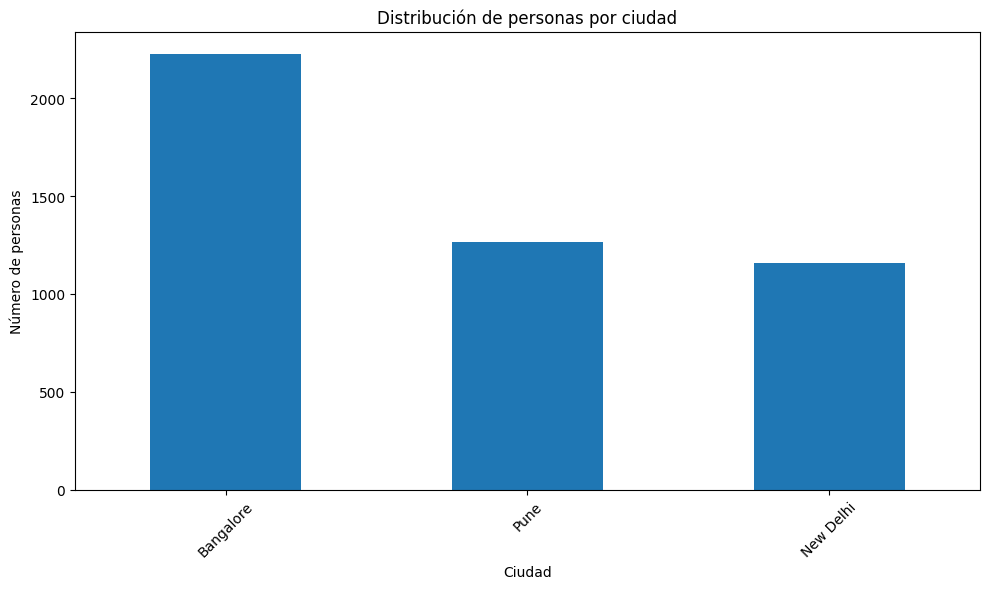

In [5]:
# Visualización en histograma / gráfico de barras
plt.figure(figsize=(10,6))
city_counts.plot(kind="bar")

plt.xlabel("Ciudad")
plt.ylabel("Número de personas")
plt.title("Distribución de personas por ciudad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
age_counts = db["Age"].value_counts()
age_counts

Age
26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: count, dtype: int64

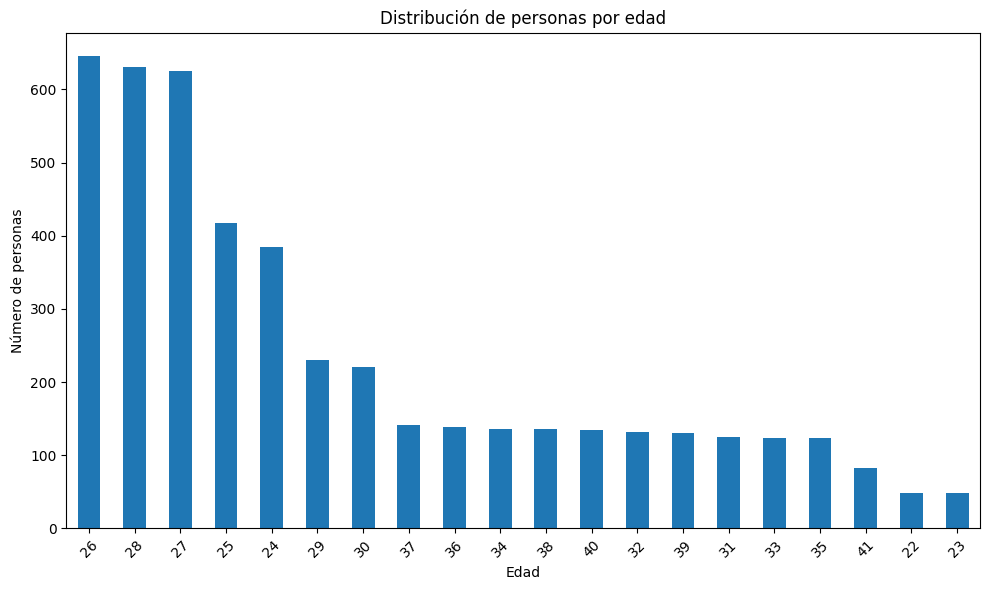

In [7]:
# Visualización en histograma / gráfico de barras
plt.figure(figsize=(10,6))
age_counts.plot(kind="bar")

plt.xlabel("Edad")
plt.ylabel("Número de personas")
plt.title("Distribución de personas por edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
gender_counts = db["Gender"].value_counts()
gender_counts

Gender
Male      2778
Female    1875
Name: count, dtype: int64

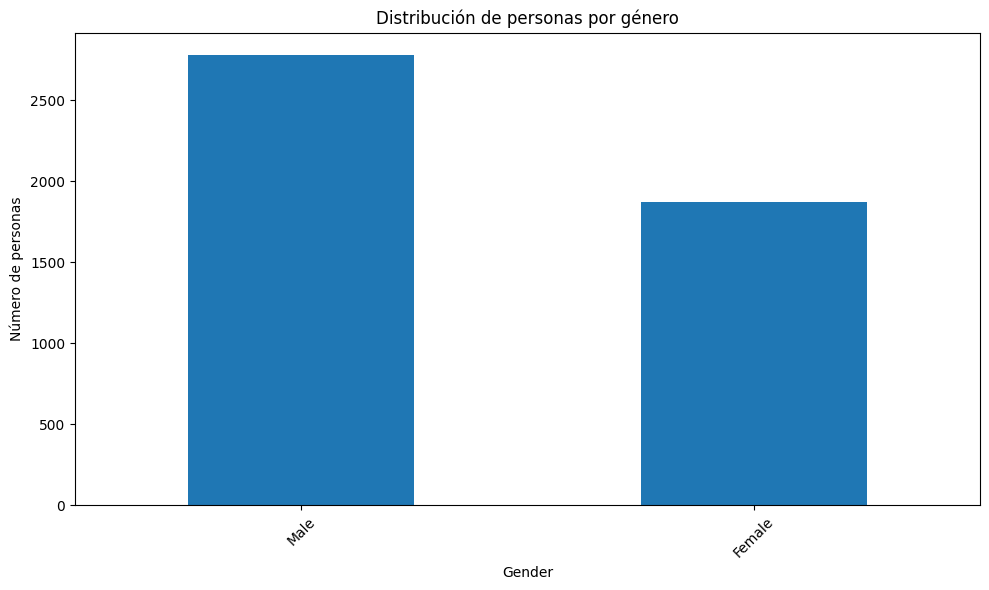

In [9]:
# Visualización en histograma / gráfico de barras
plt.figure(figsize=(10,6))
gender_counts.plot(kind="bar")

plt.xlabel("Gender")
plt.ylabel("Número de personas")
plt.title("Distribución de personas por género")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# app.py
from fastapi import FastAPI, Query
from fastapi.middleware.cors import CORSMiddleware
import pandas as pd

app = FastAPI()

# permitir front local (ajustar orígenes)
app.add_middleware(
    CORSMiddleware,
    allow_origins=["*"],
    allow_methods=["GET"],
    allow_headers=["*"],
)

# Cargar dataset (CSV) — sustituir por conexión a Postgres en prod
df = pd.read_csv("employees.csv")  # usa tu CSV exportado

@app.get("/api/city_counts")
def city_counts(min_count: int = 0):
    """
    Devuelve conteo de personas por ciudad.
    Parámetro opcional min_count para filtrar ciudades con menos registros.
    """
    vc = df["City"].value_counts().reset_index()
    vc.columns = ["city", "count"]
    vc = vc[vc["count"] >= min_count]
    # ordenar descendente
    vc = vc.sort_values("count", ascending=False)
    return vc.to_dict(orient="records")

@app.get("/api/profiles")
def get_profiles(city: str = None, age: int = None, gender: str = None, limit: int = 100):
    q = df
    if city:
        q = q[q["City"] == city]
    if age is not None:
        q = q[q["Age"] == age]
    if gender:
        q = q[q["Gender"].str.lower() == gender.lower()]
    return q.head(limit).to_dict(orient="records")
